In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (10,8)

In [3]:
os.getcwd()

'/mnt/c/Users/Master/Desktop/Adalab/Adalab-project-da-promo-A-module-3-team-4'

In [4]:
#os.chdir('/mnt/c/Users/User/Desktop/ADALAB/MODULO3/Adalab-project-da-promo-A-module-3-team-4')

In [5]:
df = pd.read_csv('datos/bikes.csv', index_col=0)

In [6]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


- instant: record index
- dteday : date
- season : season (spring, summer, autumn, winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

# Exploración Inicial

In [7]:
df.shape

(730, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000


In [10]:
df.duplicated().sum()

0

In [11]:
df_cat = df.select_dtypes(include='object')
df_cat.head()

,dteday,season
0,01-01-2018,spring
1,02-01-2018,spring
2,03-01-2018,spring
3,04-01-2018,spring
4,05-01-2018,spring


In [12]:
df_num = df.select_dtypes(include=np.number)
df_num.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# creamos un diccionario para renombrar las columnas

dicc_columnas = {'instant': 'indice',
'dteday' : 'fecha',
'season' : 'estacion',
'yr' : 'año',
'mnth' : 'mes',
'holiday' : 'festivo', 
'weekday' : 'dia_semana',
'workingday' : 'dia_laboral',
'weathersit' : 'tiempo',
'temp' : 'temperatura',
'atemp': 'sensacion_term',
'hum': 'humedad',
'windspeed': 'velocidad_viento',
'casual': 'cliente_casual',
'registered': 'cliente_registrado',
'cnt': 'total_clientes'}

In [14]:
# renombramos las columnas segun el diccionario 

df.rename(columns = dicc_columnas, inplace=True)

In [15]:
# ponemos la nueva columna 'index' como indice

df.set_index('indice', inplace=True)

In [16]:
df.head(2)

,fecha,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [17]:
# inspeccionamos los tipos de datos de las columnas
df.dtypes

fecha                  object
estacion               object
año                     int64
mes                     int64
festivo                 int64
dia_semana              int64
dia_laboral             int64
tiempo                  int64
temperatura           float64
sensacion_term        float64
humedad               float64
velocidad_viento      float64
cliente_casual          int64
cliente_registrado      int64
total_clientes          int64
dtype: object

In [18]:
# convertimos la columna fecha a tipo datetime

df['fecha'] = df['fecha'].apply(pd.to_datetime)

/tmp/ipykernel_2508/3123217447.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['fecha'] = df['fecha'].apply(pd.to_datetime)


In [19]:
# funcion para sacar el año con un apply

def sacar_año(x):
    return x.strftime('%Y')

In [20]:
# funcion para sacar el mes con un apply

def sacar_mes(x):
    return x.strftime('%B')

In [21]:
# sobreescribimos la columna del año sacando el año directamente de la fecha

df['año'] = df['fecha'].apply(sacar_año)

In [22]:
# sobreescribimos la columna de meses sacando el mes directamente de la fecha

df['mes'] = df['fecha'].apply(sacar_mes)

In [23]:
def estacion(x):
    if x.strftime('%m-%d') <= '03-20':
        return 'invierno'
    elif x.strftime('%m-%d') <= '06-20':
        return 'primavera'
    elif x.strftime('%m-%d') <= '09-20' :
        return 'verano'
    elif x.strftime('%m-%d') <= '12-20':
        return 'otoño'
    elif x.strftime('%m-%d') <= '12-31':
        return 'invierno'

In [24]:
df['estacion'] = df['fecha'].apply(estacion)

In [25]:
df.dtypes

fecha                 datetime64[ns]
estacion                      object
año                           object
mes                           object
festivo                        int64
dia_semana                     int64
dia_laboral                    int64
tiempo                         int64
temperatura                  float64
sensacion_term               float64
humedad                      float64
velocidad_viento             float64
cliente_casual                 int64
cliente_registrado             int64
total_clientes                 int64
dtype: object

In [26]:
dt

<module 'datetime' from '/home/cassia_d/anaconda3/lib/python3.9/datetime.py'>

In [27]:
df['dia_semana'] = df['fecha'].dt.dayofweek

In [28]:
df['dia_semana']

indice
1      0
2      3
3      3
4      6
5      1
      ..
726    4
727    5
728    6
729    0
730    1
Name: dia_semana, Length: 730, dtype: int64

In [29]:
# cambiamos los numeros por días de la semana
def cambiar_dias_semana(x):
    if x == 0:
        return 'Lunes'
    elif x ==1:
        return 'Martes'
    elif x == 2:
        return 'Miercoles'
    elif x == 3:
        return 'Jueves'
    elif x == 4:
        return 'Viernes'
    elif x == 5:
        return 'Sabado'
    else:
        return 'Domingo'
    

In [30]:
df['dia_semana'] = df['dia_semana'].apply(cambiar_dias_semana)


In [31]:
# confirmamos que la columna de festivos estaá mal codificada, por lo que creamos un diccionario con los festivos para asignarle los valores correctos con el método .isin()

festivos = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28', '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12', '2018-11-22', '2018-12-25',
               '2019-01-01', '2019-01-21', '2019-05-27', '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11', '2019-11-28', '2019-12-25']

In [32]:

df['festivo'] = np.where(df['fecha'].isin(festivos), 1,0)

In [33]:
# codificamos bien la columna día laboral (observamos que lunes y sábado están mal codificadas) y lo aplicamos con el método apply

def codificar_dias_laborables(dias_semana, festivos):
    if festivos == 1:
        return 0
    elif dias_semana == 'Domingo' or dias_semana == 'Sabado':
        return 0
    else:
        return 1
        

In [34]:
df['dia_laboral'] = df.apply(lambda x:codificar_dias_laborables(x['dia_semana'], x['festivo']), axis=1)

In [35]:
df.head()

,fecha,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo,temperatura,sensacion_term,humedad,velocidad_viento,cliente_casual,cliente_registrado,total_clientes
indice,,,,,,,,,,,,,,,
1,2018-01-01,invierno,2018,January,1,Lunes,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-02-01,invierno,2018,February,0,Jueves,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-03-01,invierno,2018,March,0,Jueves,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-04-01,primavera,2018,April,0,Domingo,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-05-01,primavera,2018,May,0,Martes,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [36]:
df.dtypes

fecha                 datetime64[ns]
estacion                      object
año                           object
mes                           object
festivo                        int64
dia_semana                    object
dia_laboral                    int64
tiempo                         int64
temperatura                  float64
sensacion_term               float64
humedad                      float64
velocidad_viento             float64
cliente_casual                 int64
cliente_registrado             int64
total_clientes                 int64
dtype: object

In [37]:
for i in ['festivo', 'dia_laboral', 'tiempo']:
    df[i] = df[i].astype('category')

In [38]:
df.to_csv('datos/bikes_limpio.csv')

In [39]:
df_cat = df.select_dtypes(exclude=np.number).drop('fecha', axis=1)
df_cat.head(2)

,estacion,año,mes,festivo,dia_semana,dia_laboral,tiempo
indice,,,,,,,
1,invierno,2018,January,1,Lunes,0,2
2,invierno,2018,February,0,Jueves,1,2


/tmp/ipykernel_2508/1602557378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


<AxesSubplot:>

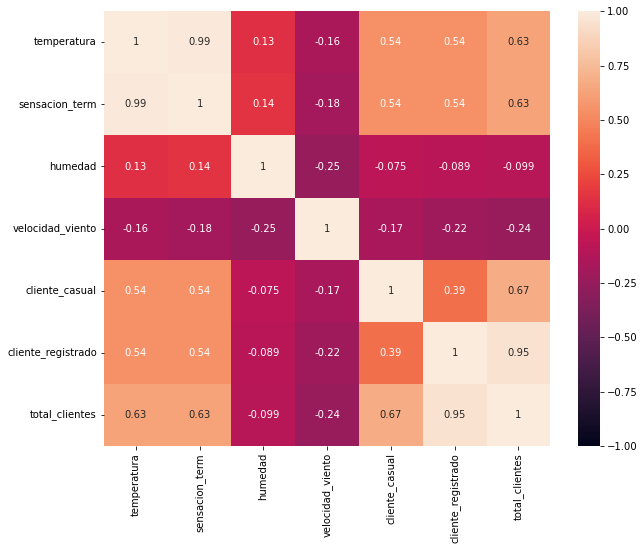

In [40]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

- observando las correlaciones, vemos que se podrían eliminar algunas columnas redundantes o que no tienen fuertes correlaciones con las posibles VR:
    - sensacion_term (muy parecido a temperatura)
    - humedad (muy baja correlación con el numero de clientes)
    - velocidad del viento (baja correlación con el numero de clientes)

In [41]:
q3 = np.percentile(df["cliente_casual"], 75)
q3

1096.5

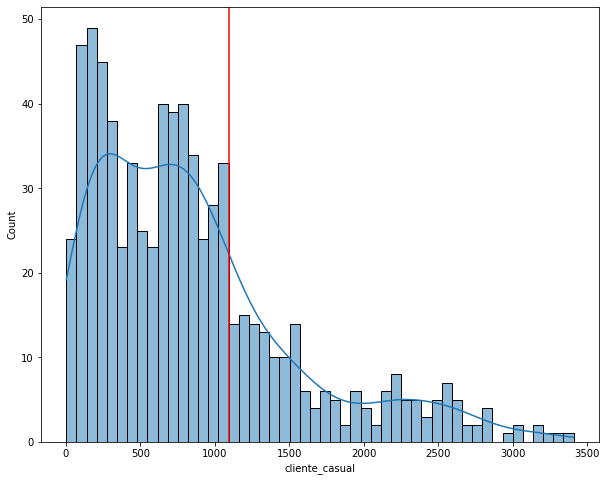

In [42]:
plt.figure()
sns.histplot(x='cliente_casual', data=df, kde=True, bins=50)
plt.axvline(x= q3, color ='red')

- VARIABLES NUMÉRICAS QUE AFECTAN A VRs
    - la temperatura
- VARIABLES CATEGÓRICAS (QUE HABRÁ QUE CODIFICAR) QUE AFECTAN:
    - el tiempo
    - festivo
    - día_semana/día_laboral

- Hemos decidido que vamos a dividir los datos: por clientes casuales y registrados, para hacer dos modelos de predicción distintos, según el tipo de cliente.

- Dejamos el dataframe listo para trabajar y para ello:
  - Tras haber estudiado los datos visualmente (con un heatmap), hemos decidido eliminar la variable "sensación_térmica", ya que es la misma información que aparece en temperatura.
  - También vemos claro que la columna "Total" no nos resulta interesante.
  - Del mismo modo, vemos que la variable "Humedad" apenas tiene relación con las que serán nuestras VR, por lo tanto, decidimos prescindir de ella.

In [43]:
#Eliminamos las columnas

df.drop(['sensacion_term', 'total_clientes', 'humedad'], axis = 1, inplace=True)

# Outliers

In [44]:
# Eliminar
# Outliers
# outlier_step
# = 1.5 * IQR calcular outlier step
# outliers_data
# = df df ['columna'] < Q1
# outlier_step ) | df ['columna'] > Q3 +
# outlier_step )] identificar datos fuera del
# rango del maximo hasta el minimo
# lista_outliers_index
# = outliers_data .
# index) crear una lista de los indices de las
# filas con outliers
# if
# outliers_data.shape [0] >
# dicc_indices
# [key] =
# ( outliers_data.index crear un
# diccionario de los indices de las filas con
# nulos ; se puede hacer iterando por columnas
# valores
# = dicc_indices.values sacar todos
# los valores e.g. todos los indices
# valores
# = indice for sublista in valores for
# indice in sublista set comprehension para
# eliminar duplicados
# df_sin_outliers
# = df.drop df.index [list
# valores crear nuevo dataframe sin outliers

In [45]:
q3, q1 = np.percentile(df["cliente_casual"], [75, 25])
IQR = q3 - q1

In [46]:
outlier_step = 1.5 * IQR